In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

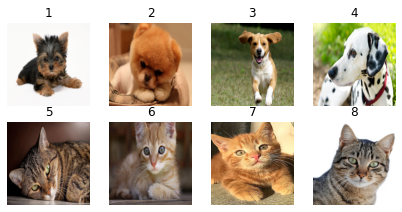

In [4]:
numImages = 8

fig = plt.figure(figsize =(7,7))
imgData = np.zeros(shape=(numImages,270000))

for i in range(1, numImages+1):
    filename = './data/derekswork/animals/Picture'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [10]:
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['animal'] = ['dog', 'dog', 'dog', 'dog', 'cat', 'cat','cat','cat']
projected

,pc1,pc2,animal
1,47418.908902,-7804.560588,dog
2,-4478.638904,-2924.532187,dog
3,-23518.205512,-4948.807255,dog
4,6648.144911,36919.058376,dog
5,-29466.102761,-7961.790671,cat
6,-26254.173143,-6703.680342,cat
7,-3660.149579,5312.618613,cat
8,33310.216085,-11888.305946,cat


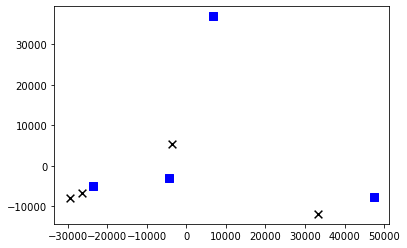

In [12]:
import matplotlib.pyplot as plt

colors = {'cat':'k', 'dog':'b'}
markerTypes = {'dog':'s', 'cat':'x'}

for animalType in markerTypes:
    d = projected[projected['animal']==animalType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[animalType],s=60,marker=markerTypes[animalType])

## Despite the above graph not providing much insight, this is a good example of when that would be the case, and a demonstration of the limits of PCA, and when it would be useful.

#### Notice some things: 
#### 1. The only input to the 'PCA function' (broadly speaking) was an 'array' of pixel colors. In the original example of PCA, the images had consistent color similarities between food types. The images in the example PCA seem chosen with colors in mind. However, in my implementation, the four images of cats and dogs were more randomly chosen: simply the first 4 images on an image search.

#### 2. Do the chosen cat images and dog images contain significantly different color schemes? No. (Hence the PCA being unable to make groups of similar images effectively.)
#### 3. One dog image and one cat image had a completely white background. Because the analysis depends on color, that would effect the location on the graph. Do you see a 'square' and an 'x' somewhat close together, but separate from the other images? I do.

#### Although I don't understand the math behind PCA, I feel like I learned something from this and hopefully you did too.